In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

#### Find countries with super-high testing compared to average and low cases ratio compared to average
##### Publish a tooltip note on cases/1M population world map 

In [5]:
wom = pd.read_csv('https://raw.githubusercontent.com/iMEdD-Lab/open-data/master/COVID-19/wom_data.csv')

In [6]:
wom.tail()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Continent
208,Papua New Guinea,2,NaN,NaN,NaN,NaN,2,NaN,0.2,NaN,72,8,Australia/Oceania
209,Saint Pierre Miquelon,1,NaN,NaN,NaN,NaN,1,NaN,173,NaN,NaN,NaN,North America
210,Yemen,1,NaN,NaN,NaN,NaN,1,NaN,0.03,NaN,NaN,NaN,Asia
211,China,"82,249",+89,"3,341",NaN,"77,738","1,170",116,57,2,NaN,NaN,Asia
212,Total:,"1,947,860","+24,012","121,793","+2,175","460,238","1,365,829","51,045",249.9,15.6,NaN,NaN,All


In [7]:
wom = wom[:-1]

In [8]:
wom.dtypes

Country,Other       object
TotalCases          object
NewCases            object
TotalDeaths         object
NewDeaths           object
TotalRecovered      object
ActiveCases         object
Serious,Critical    object
Tot Cases/1M pop    object
Deaths/1M pop       object
TotalTests          object
Tests/ 1M pop       object
Continent           object
dtype: object

In [9]:
wom.columns[8]

'Tot\xa0Cases/1M pop'

In [10]:
wom = wom.rename(columns={wom.columns[8]:'Total Cases/1M pop'})

In [11]:
wom['TotalCases'] = wom['TotalCases'].str.replace(',','')
wom['NewCases'] = wom['NewCases'].str.replace(',','')
wom['TotalDeaths'] = wom['TotalDeaths'].str.replace(',','')
wom['NewDeaths'] = wom['NewDeaths'].str.replace(',','')
wom['TotalRecovered'] = wom['TotalRecovered'].str.replace(',','')
wom['ActiveCases'] = wom['ActiveCases'].str.replace(',','')
wom['Serious,Critical'] = wom['Serious,Critical'].str.replace(',','')
wom['Total Cases/1M pop'] = wom['Total Cases/1M pop'].str.replace(',','')
wom['Deaths/1M pop'] = wom['Deaths/1M pop'].str.replace(',','')
wom['TotalTests'] = wom['TotalTests'].str.replace(',','')
wom['Tests/ 1M pop'] = wom['Tests/ 1M pop'].str.replace(',','')

In [12]:
wom['TotalCases'] = wom['TotalCases'].astype(float)
wom['NewCases'] = wom['NewCases'].astype(float)
wom['TotalDeaths'] = wom['TotalDeaths'].astype(float)
wom['NewDeaths'] = wom['NewDeaths'].astype(float)
wom['TotalRecovered'] = wom['TotalRecovered'].astype(float)
wom['ActiveCases'] = wom['ActiveCases'].astype(float)
wom['Serious,Critical'] = wom['Serious,Critical'].astype(float)
wom['Total Cases/1M pop'] = wom['Total Cases/1M pop'].astype(float)
wom['Deaths/1M pop'] = wom['Deaths/1M pop'].astype(float)
wom['TotalTests'] = wom['TotalTests'].astype(float)
wom['Tests/ 1M pop'] = wom['Tests/ 1M pop'].astype(float)

In [13]:
wom['Tests/ 1M pop'].median()

2742.0

In [14]:
wom['Tests/ 1M pop'].mean()

8210.3625

In [15]:
# New Column 1
wom['testing_mean_diff_pct'] = ((wom['Tests/ 1M pop']-wom['Tests/ 1M pop'].mean())/wom['Tests/ 1M pop'].mean())*100

In [16]:
# New Column 2
wom['testing_median_diff_pct'] = ((wom['Tests/ 1M pop']-wom['Tests/ 1M pop'].median())/wom['Tests/ 1M pop'].median())*100

In [17]:
# New Column 3
wom['cases_rate_normalized'] = (wom['Total Cases/1M pop']*100)/wom['Tests/ 1M pop']

In [18]:
# New Column 4 - I need population data; not included in this newest csv

# wom['estimated_cases/1M pop'] = (\
#                                  ((wom['TotalCases']*wom['Population (2020)'])/wom['TotalTests'])/\
#                                 wom['Population (2020)']\
#                                 )*1000000

In [19]:
# New Column 5
wom['cases_rate_mean_diff_pct'] = ((wom['cases_rate_normalized']-wom['cases_rate_normalized'].mean())/wom['cases_rate_normalized'].mean())*100

In [20]:
# New Column 6
wom['cases_rate_median_diff_pct'] = ((wom['cases_rate_normalized']-wom['cases_rate_normalized'].median())/wom['cases_rate_normalized'].median())*100

In [21]:
#New Columns 7, 8, 9

conditions = [
    (wom['testing_median_diff_pct'] > 500) & (wom['cases_rate_median_diff_pct'] < 0)
    ]
choices1 = ['Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητα, η συγκεκριμένη χώρα αντιμετωπίζει πολύ μικρότερο πρόβλημα συγκριτικά με άλλες -και όχι το αντίστροφο, όπως φαίνεται στη χαρτογράφηση των κρουσμάτων ανά 1 εκατ. πληθυσμού']
choices2 = ['Πιθανότατα η χώρα αντιμετωπίζει, συγκριτικά με άλλες, πολύ μικρότερο πρόβλημα από αυτό που αποτυπώνεται στη χαρτογράφηση των καταγεγραμμένων κρουσμάτων/1 εκατ. πληθυσμού.']
choices3 = ['YES']

wom['about_note'] = np.select(conditions, choices1, default='')
wom['tooltip_note'] = np.select(conditions, choices2, default='')
wom['testing_high'] = np.select(conditions, choices3, default='')
wom['cases_rate_low'] = np.select(conditions, choices3, default='')

In [22]:
wom['about_note'].value_counts(dropna=False)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          202
Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητ

In [23]:
wom['tooltip_note'].value_counts(dropna=False)

                                                                                                                                                                              202
Πιθανότατα η χώρα αντιμετωπίζει, συγκριτικά με άλλες, πολύ μικρότερο πρόβλημα από αυτό που αποτυπώνεται στη χαρτογράφηση των καταγεγραμμένων κρουσμάτων/1 εκατ. πληθυσμού.    10 
Name: tooltip_note, dtype: int64

In [24]:
wom.sort_values(by='testing_median_diff_pct',ascending=False).head(50)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Total Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Continent,testing_mean_diff_pct,testing_median_diff_pct,cases_rate_normalized,cases_rate_mean_diff_pct,cases_rate_median_diff_pct,about_note,tooltip_note,testing_high,cases_rate_low
117,Faeroe Islands,184.0,NaN,NaN,NaN,163.0,21.0,NaN,3766.0,NaN,5602.0,114647.0,Europe,1296.369527,4081.145150,3.284866,-66.307663,-45.957820,"Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητα, η συγκεκριμένη χώρα αντιμετωπίζει πολύ μικρότερο πρόβλημα συγκριτικά με άλλες -και όχι το αντίστροφο, όπως φαίνεται στη χαρτογράφηση των κρουσμάτων ανά 1 εκατ. πληθυσμού","Πιθανότατα η χώρα αντιμετωπίζει, συγκριτικά με άλλες, πολύ μικρότερο πρόβλημα από αυτό που αποτυπώνεται στη χαρτογράφηση των καταγεγραμμένων κρουσμάτων/1 εκατ. πληθυσμού.",YES,YES
56,Iceland,1720.0,9.0,8.0,NaN,989.0,723.0,8.0,5040.0,23.0,36339.0,106490.0,Europe,1197.019468,3783.661561,4.732839,-51.456038,-22.135957,"Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητα, η συγκεκριμένη χώρα αντιμετωπίζει πολύ μικρότερο πρόβλημα συγκριτικά με άλλες -και όχι το αντίστροφο, όπως φαίνεται στη χαρτογράφηση των κρουσμάτων ανά 1 εκατ. πληθυσμού","Πιθανότατα η χώρα αντιμετωπίζει, συγκριτικά με άλλες, πολύ μικρότερο πρόβλημα από αυτό που αποτυπώνεται στη χαρτογράφηση των καταγεγραμμένων κρουσμάτων/1 εκατ. πληθυσμού.",YES,YES
37,UAE,4521.0,NaN,25.0,NaN,852.0,3644.0,1.0,457.0,3.0,648195.0,65538.0,Asia,698.235157,2290.153173,0.697305,-92.847851,-88.528023,"Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητα, η συγκεκριμένη χώρα αντιμετωπίζει πολύ μικρότερο πρόβλημα συγκριτικά με άλλες -και όχι το αντίστροφο, όπως φαίνεται στη χαρτογράφηση των κρουσμάτων ανά 1 εκατ. πληθυσμού","Πιθανότατα η χώρα αντιμετωπίζει, συγκριτικά με άλλες, πολύ μικρότερο πρόβλημα από αυτό που αποτυπώνεται στη χαρτογράφηση των καταγεγραμμένων κρουσμάτων/1 εκατ. πληθυσμού.",YES,YES
124,Gibraltar,129.0,NaN,NaN,NaN,93.0,36.0,1.0,3829.0,NaN,1649.0,48945.0,Europe,496.136894,1685.010941,7.823067,-19.760069,28.704068,,,,
42,Luxembourg,3292.0,NaN,69.0,NaN,500.0,2723.0,30.0,5259.0,110.0,29315.0,46831.0,Europe,470.388944,1607.913931,11.229741,15.181638,84.750227,,,,
97,Malta,393.0,9.0,3.0,NaN,44.0,346.0,4.0,890.0,7.0,19121.0,43305.0,Europe,427.443216,1479.321663,2.055190,-78.920249,-66.188285,"Σημαντική σημείωση: Τα τεστ που εμφανίζεται να έχει κάνει η χώρα είναι, αναλογικά με τον πληθυσμό της, πολύ αυξημένα συγκριτικά με τη διάμεσο των τεστ που έχουν γίνει ανά χώρα παγκοσμίως. Παράλληλα, εκτιμάται ότι το ποσοστό των επιβεβαιωμένων κρουσμάτων, αναλογικά με τα τεστ, στη χώρα είναι πολύ χαμηλότερο από το αντίστοιχο διάμεσο ποσοστό παγκοσμίως. Για αυτόν τον λόγο, υπολογίζεται ότι, στην πραγματικότητα, η συγκεκριμένη χώρα αντιμετωπίζει πολύ μικρότερο πρόβλημα συγκριτικά με άλλες -και όχι το αντίστροφο, όπως φαίνεται στη χαρτο

#### Find kmeans and visualize clusters of countries

In [25]:

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [26]:
wom = wom[wom['Tests/ 1M pop'].notnull()]

In [27]:
wom = wom[wom['Total Cases/1M pop'].notnull()]

In [28]:
wom.shape

(160, 22)

In [29]:
X = np.array(list(zip(wom['Tests/ 1M pop'], wom['Total Cases/1M pop']))).reshape(len(wom['Tests/ 1M pop']), 2) 

In [30]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

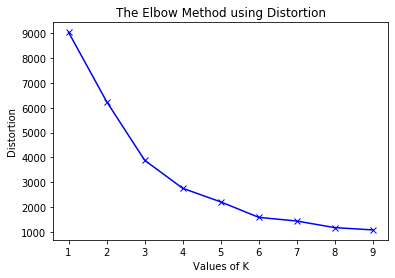

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

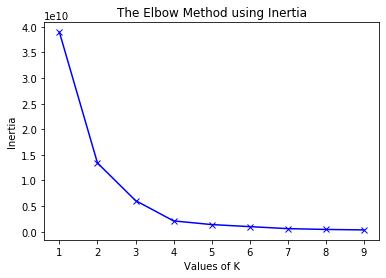

In [32]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [33]:
df = wom[['Tests/ 1M pop','Total Cases/1M pop']].copy()

In [34]:
df.shape

(160, 2)

In [35]:
df.dtypes

Tests/ 1M pop         float64
Total Cases/1M pop    float64
dtype: object

In [36]:
kmeans = KMeans(n_clusters=5).fit(df)

[[  1700.14678899    179.89816514]
 [ 47458.16666667   2127.66666667]
 [110568.5          4403.        ]
 [ 11252.37931034    902.51724138]
 [ 21152.64285714   2855.78571429]]


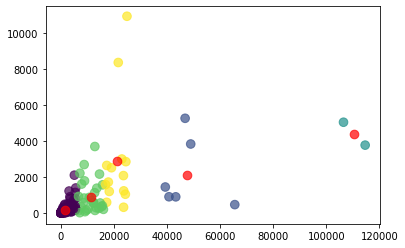

In [37]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Tests/ 1M pop'], df['Total Cases/1M pop'], c= kmeans.labels_.astype(float), s=75, alpha=.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=75, alpha=.7)
plt.show()

[[  2332.72727273    255.07355372]
 [110568.5          4403.        ]
 [ 16952.           1770.93548387]
 [ 47458.16666667   2127.66666667]]


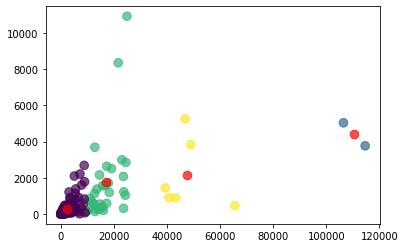

In [38]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Tests/ 1M pop'], df['Total Cases/1M pop'], c= kmeans.labels_.astype(float), s=75, alpha=.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=75, alpha=.7)
plt.show()

[[8.25829268e+02 7.17304878e+01]
 [1.10568500e+05 4.40300000e+03]
 [4.74581667e+04 2.12766667e+03]
 [1.44099091e+04 1.02800000e+03]
 [2.31660000e+04 3.58700000e+03]
 [5.50107692e+03 6.40564103e+02]]


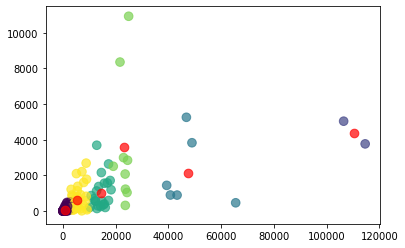

In [39]:
kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Tests/ 1M pop'], df['Total Cases/1M pop'], c= kmeans.labels_.astype(float), s=75, alpha=.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=75, alpha=.7)
plt.show()